<a href="https://colab.research.google.com/github/urvigodha/Viral_Tweets/blob/main/Viral_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,accuracy_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
# from catboost import CatBoostClassifier

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Viral Tweets Prediction Challenge Dataset/train.csv',index_col=0)
test = pd.read_csv('/content/drive/MyDrive/Viral Tweets Prediction Challenge Dataset/test.csv',index_col=0)
Y = pd.read_csv('/content/drive/MyDrive/Viral Tweets Prediction Challenge Dataset/Dataset/Tweets/train_tweets.csv').virality
print(train.shape)
print(Y.shape)
print(test.shape)

(29625, 24)
(29625,)
(12697, 24)


In [4]:
train_tweets = pd.read_csv('/content/drive/MyDrive/Viral Tweets Prediction Challenge Dataset/Dataset/Tweets/train_tweets.csv')

In [5]:
test.tweet_attachment_class = test.tweet_attachment_class.map({'A':1,'B':2,'C':3})
train.tweet_attachment_class = train.tweet_attachment_class.map({'A':1,'B':2,'C':3})
train.drop(columns='tweet_topic_ids', inplace=True)
test.drop(columns='tweet_topic_ids',inplace=True)

In [6]:
train.head()

,tweet_id,tweet_user_id,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_attachment_class,tweet_language_id,user_id,user_like_count,user_followers_count,user_following_count,user_listed_on_count,user_has_location,user_tweet_count,user_has_url,user_verified,user_created_at_year,user_created_at_month
0,34698.0,10.0,2015.0,12.0,5.0,3.0,2.0,1.0,0.0,False,3,0.0,10,9365,398591,136081,18462,True,169980,True,0,2011,10
1,24644.0,4.0,2020.0,6.0,19.0,0.0,0.0,1.0,0.0,False,3,0.0,4,15311,459083,1021,7368,False,121193,False,0,2011,6
2,36321.0,54.0,2019.0,6.0,2.0,15.0,2.0,3.0,0.0,True,1,0.0,54,336,447110,584,10519,True,3786,True,0,2011,12
3,2629.0,42.0,2020.0,9.0,6.0,17.0,0.0,1.0,1.0,True,1,0.0,42,1124,276541,758,6163,True,3264,True,0,2011,9
4,28169.0,32.0,2020.0,11.0,4.0,17.0,2.0,1.0,0.0,True,1,0.0,32,0,1587783,2,16414,False,2022,True,0,2013,7


In [7]:
train['user_years'] = train.tweet_created_at_year - train.user_created_at_year   #useful

In [8]:
train['user_ratio']=train.user_followers_count / train.user_following_count.replace(0,1)

In [11]:
train['eng'] = (train['tweet_language_id']==0)  # not very useful (for rf atleast)

In [12]:
train['virality'] = Y

In [13]:
train = train.set_index('tweet_id')
test = test.set_index('tweet_id')

In [14]:
mean_virality = train.groupby(['user_id']).mean().virality
for i in train.index:
  train.loc[i,'mean_virality'] = mean_virality[train.user_id[i]]
for i in test.index:
  test.loc[i,'mean_virality'] = mean_virality[test.user_id[i]]

In [15]:
train.drop('virality',axis=1,inplace=True)

Text(0.5, 0, 'Random Forest Feature Importance')

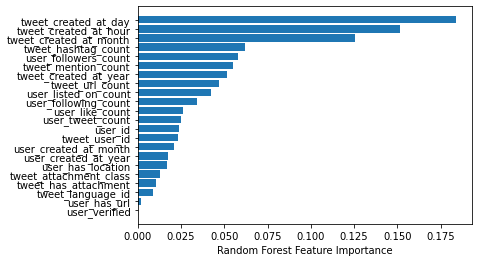

In [39]:
rf = RandomForestClassifier()
rf.fit(train,Y)
sorted_idx = rf.feature_importances_.argsort()
plt.barh(train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [103]:
rf.feature_importances_[-11:].sum()

0.2671153512471562

In [100]:
train.columns[-11:]

Index(['user_like_count', 'user_followers_count', 'user_following_count',
       'user_listed_on_count', 'user_has_location', 'user_tweet_count',
       'user_has_url', 'user_verified', 'user_created_at_year',
       'user_created_at_month', 'mean_virality'],
      dtype='object')

Text(0.5, 0, 'Random Forest Feature Importance')

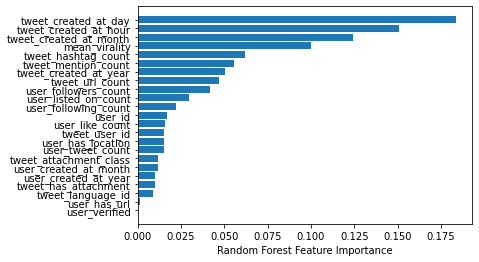

In [83]:
rf2 = RandomForestClassifier()
rf2.fit(train,Y)
sorted_idx = rf2.feature_importances_.argsort()
plt.barh(train.columns[sorted_idx], rf2.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [104]:
rf2.feature_importances_[-12:].sum()

0.2800798602542903

Text(0.5, 0, 'Random Forest Feature Importance')

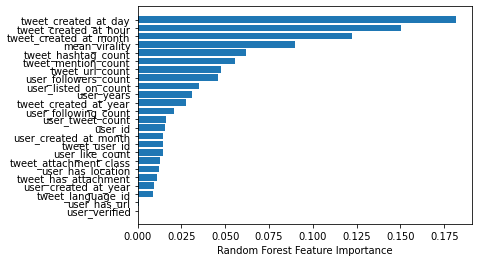

In [111]:
rf3 = RandomForestClassifier()
rf3.fit(train,Y)
sorted_idx = rf3.feature_importances_.argsort()
plt.barh(train.columns[sorted_idx], rf3.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [112]:
rf3.feature_importances_[-13:].sum()

0.30602971649162647

Text(0.5, 0, 'Random Forest Feature Importance')

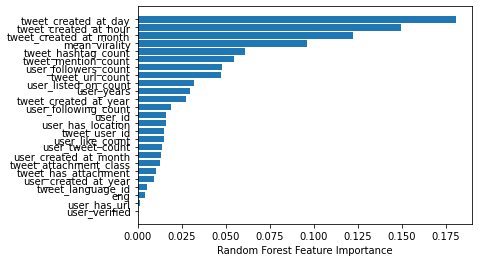

In [122]:
rf4 = RandomForestClassifier()
rf4.fit(train,Y)
sorted_idx = rf4.feature_importances_.argsort()
plt.barh(train.columns[sorted_idx], rf4.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

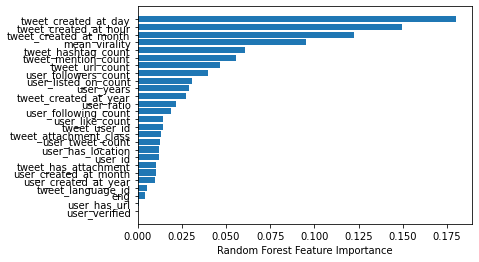

In [16]:
rf5 = RandomForestClassifier()
rf5.fit(train,Y)
sorted_idx = rf5.feature_importances_.argsort()
plt.barh(train.columns[sorted_idx], rf5.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [19]:
rf5.feature_importances_[-15:].sum()

0.3130410497258061

In [20]:
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [114]:
X_train, X_test, y_train, y_test = train_test_split(train, Y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20737, 24)
(8888, 24)
(20737,)
(8888,)


In [87]:
clf = LogisticRegression(C=1, penalty='l1', solver='liblinear')
clf.fit(X_train,y_train)
print('Train: ',clf.score(X_train,y_train))
print('Test: ',clf.score(X_test,y_test))

Train:  0.6329266528427449
Test:  0.634000900090009


In [88]:
clf = KNeighborsClassifier()
clf.fit(X_train,y_train)
print('Train: ',clf.score(X_train,y_train))
print('Test: ',clf.score(X_test,y_test))

Train:  0.725177219462796
Test:  0.6361386138613861


In [ ]:
clf = KNeighborsClassifier(10)
clf.fit(X_train,y_train)
print('Train: ',clf.score(X_train,y_train))
print('Test: ',clf.score(X_test,y_test))

Train:  0.700438829145971
Test:  0.6479522952295229


In [ ]:
clf = KNeighborsClassifier(50)
clf.fit(X_train,y_train)
print('Train: ',clf.score(X_train,y_train))
print('Test: ',clf.score(X_test,y_test))

Train:  0.6619086656700583
Test:  0.6488523852385238


In [ ]:
k = range(10,50)
knn_train = []
knn_test = []
for i in k:
  clf = KNeighborsClassifier(i)
  clf.fit(X_train,y_train)
  knn_train.append(clf.score(X_train,y_train))
  knn_test.append(clf.score(X_test,y_test))

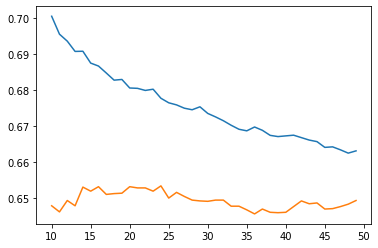

In [ ]:
plt.plot(k,knn_train)
plt.plot(k,knn_test)

In [ ]:
max(knn_test)

0.6534653465346535

In [ ]:
knn_test.index(max(knn_test))

14

In [ ]:
clf = SVC()
clf.fit(X_train,y_train)
print('Train: ',clf.score(X_train,y_train))
print('Test: ',clf.score(X_test,y_test))

Train:  0.5385542749674495
Test:  0.5414041404140414


In [ ]:
clf = SGDClassifier()
clf.fit(X_train,y_train)
print('Train: ',clf.score(X_train,y_train))
print('Test: ',clf.score(X_test,y_test))

Train:  0.46429088103390076
Test:  0.47164716471647167


In [ ]:
clf = XGBClassifier()
clf.fit(X_train,y_train)
print('Train: ',clf.score(X_train,y_train))
print('Test: ',clf.score(X_test,y_test))

Train:  0.6593528475671505
Test:  0.6529027902790279


In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
print('Train: ',clf.score(X_train,y_train))
print('Test: ',clf.score(X_test,y_test))

Train:  1.0
Test:  0.6612286228622862


In [117]:
clf = RandomForestClassifier(1200,max_depth= 25,min_samples_leaf= 1,min_samples_split= 10)
clf.fit(X_train,y_train)
print('Train: ',clf.score(X_train,y_train))
print('Test: ',clf.score(X_test,y_test))

Train:  0.8206105029657135
Test:  0.6723672367236724


In [ ]:
clf = GaussianNB()
clf.fit(X_train,y_train)
print('Train: ',clf.score(X_train,y_train))
print('Test: ',clf.score(X_test,y_test))

Train:  0.5398562955104402
Test:  0.5434293429342935


In [ ]:
clf = AdaBoostClassifier()
clf.fit(X_train,y_train)
print('Train: ',clf.score(X_train,y_train))
print('Test: ',clf.score(X_test,y_test))

Train:  0.6315764093166804
Test:  0.6284878487848785


In [ ]:
clf = CatBoostClassifier()
clf.fit(X_train,y_train)
print('Train: ',clf.score(X_train,y_train))
print('Test: ',clf.score(X_test,y_test))

In [ ]:
print('Train: ',clf.score(X_train,y_train))
print('Test: ',clf.score(X_test,y_test))

Train:  0.7809712108791049
Test:  0.6667416741674167


In [ ]:
clf.fit(train,Y)

In [ ]:
sol = test.tweet_id.to_frame()
sol['virality'] = clf.predict(test)
sol.astype(int).to_csv('sol.csv',index=False)

In [ ]:
clf1 = KNeighborsClassifier(14)
clf2 = XGBClassifier()
clf3 = RandomForestClassifier(1200,max_depth= 25,min_samples_leaf= 1,min_samples_split= 10)
clf4 = CatBoostClassifier(verbose=0)
pred_train = np.zeros((X_train.shape[0],5))
pred_test = np.zeros((X_test.shape[0],5))
for clf in [clf1,clf2,clf3,clf4]:
  clf.fit(X_train,y_train)
  pred_train += clf.predict_proba(X_train)
  pred_test += clf.predict_proba(X_test)
pred_train = np.argmax(pred_train,axis=1)+1
pred_test = np.argmax(pred_test,axis=1)+1
print('Train Accuracy: ',accuracy_score(y_train,pred_train))
print('Test Accuracy: ',accuracy_score(y_test,pred_test))

In [ ]:
pred_train = np.zeros((train.shape[0],5))
pred_test = np.zeros((test.shape[0],5))
for clf in [clf1,clf2,clf3,clf4]:
  clf.fit(train,Y)
  pred_train += clf.predict_proba(train)
  pred_test += clf.predict_proba(test)
pred_train = np.argmax(pred_train,axis=1)+1
pred_test = np.argmax(pred_test,axis=1)+1
print('Train Accuracy: ',accuracy_score(Y,pred_train))
# print('Test Accuracy: ',accuracy_score(y_test,pred_test))

Train Accuracy:  0.7502447257383966


In [ ]:
sol = test.tweet_id.to_frame()
sol['virality'] = pred_test
sol.astype(int).to_csv('sol2.csv',index=False)

In [ ]:
X_train.describe()

AttributeError: ignored

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)